In [1]:
# imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exploring the FAA's Wildlife Strike Data Base

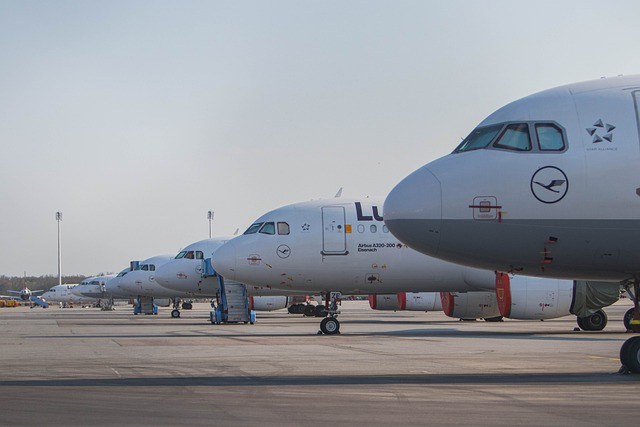
<center><font size='1'>Image by <a href = "https://pixabay.com/users/j0nqh-7668083" target="blank">Jonah de Graaff</a> from Pixabay</font></center>


## Introduction
A wildlife strike is a collision between an aircraft and a - most frequently airborne - animal, for example a bird or a bat. These incidents are common (In 2019, there were about 17000 strikes at 753 U.S. airports, according to the [Federal Aviation Administration](https://www.faa.gov/airports/airport_safety/wildlife/faq/)) and potentially pose a serious threat to aviation safety by damaging engines, windshields or the hull of the aircraft. In addition, thre is a financial aspect because the subsequent necessary repairs.

### Examples 
Although most collisions between aircraft and wildlife are benign and even go unnoticed during the flight, birds can cause severe damage to the airframe and were responsible for several aviation catastrophes throughout history.

One of the most prominent bird strike incidents is the famous landing on the Hudson river in 2009, which involved <b>US-Airways-Flight 1549</b>: An Airbus A320-214 hit a flock of geese minutes after take-off, causing both engines to fail. Due to the total loss of engine power, returning to the airport was not an option and the crew decided to perform an emergency landing on the near Hudson river. Due to the exceptional skill of the pilots, the plane ditched into the water without desintegrating, saving the lives of all 150 occupants and the five crew members. Ten years later, an analogous situation forced an A321-211 of Ural Airlines ([U6178](https://aviation-safety.net/database/record.php?id=20190815-0)) to land on a cornfield. Luckily, the cockpit crew were equally 

Obviously the above mentioned airframes had to be written off after the incident, and bird strikes are responsible for a row of other incidents leading to airframe damage in various ways. A collision with the nose gear of a B737-400 caused the nose wheel to malfunction in 2004, resulting in a runway excursion during which the nose gear collapsed ([KLM Flight 1673](https://aviation-safety.net/database/record.php?id=20041128-1), damaged beyond repair). Another B737-800 of the Indonesian carrier Lion Air veered off the runway in 2013 due to a bird strike to the main landing gears ([Lion Air Flight 892](https://aviation-safety.net/wikibase/158042), minor damage to landing gear). When the nose of a United Air Lines B737-900 was hit by a bird in 2012, the pilots lost airspeed indication due to a damaged pitot tube, but the pilots were able to land the plane safely ([United Air Lines Flight 1475](https://aviation-safety.net/wikibase/wiki.php?id=147274), damages were a large hole in the radome, a damaged pitot sensor and a dent in the vertical stabiliser). 

Other incidents involving the failure of one or more engines as a result of a bird strikes include [Ryanair Flight 4102](https://aviation-safety.net/database/record.php?id=20081110-0) (Both engines failed and part of the landing gear was damaged after the collision with a flock of birds during a go-around, 2008), [Virgin Atlantic Flight VS78](https://aviation-safety.net/wikibase/153017) (Both engines were damaged and one was shut down due to loss of engine oil pressure, additional damage to radome, 2013) and [GoAir Flight G8140](https://aviation-safety.net/wikibase/201468) (An ignored bird strike during take-off roll combined with poor airmanship, 2017).

Examples of bird strikes leading to a crash and loss of human lives are the 1988 crash of [Ethiopian Airlines Flight ET604](https://aviation-safety.net/database/record.php?id=19880915-0) (Boeing B737-200, destruction of both engines due to bird ingestion, 35 of 104 dead), [an instructional flight](https://aviation-safety.net/wikibase/45161) involving a Cessna 172S in 2002 (the flight instructor lost control over the plane after a bird strike, 2 of 2 occupants dead) and the 1996 Alaska Boeing E-3 Sentry [crash](https://aviation-safety.net/database/record.php?id=19950922-0) (Geese were ingested by both engines of the left side of a four-engined B707-type military aircraft, causing them to fail and the pilots subsequently lost control over the aircraft, crashing into a wooded area, all 24 occupants dead).

### Preventive Measures

Aside from an aircraft design which mitigates damage done by bird strikes, there here are several different methods in use for the prevention of wildlife strikes and their consequences before they occur. Wildlife management at the airport is implemented by lowering the attractiveness of airport sites to animals through the choice of an undesirable grass, population control of other food sources like rodents and prevention of the formation of wetlands, building fences to stop deer and forest animals from entering the area, visual, chemical and auditory repellents. Lethal methods may also come to practice.  

## The Databases

### The FAA Wildlife Strike Database

The FAA Wildlife Strike Database "contains records of reported wildlife strikes since 1990. Strike reporting is voluntary. Therefore, this database only represents the information we have received from airlines, airports, pilots, and other sources" [(FAA.gov)](https://wildlife.faa.gov/home). In this notebook, I explore this informative and excessive database to gain insights into the nature of wildlife strikes and their impact on aviation. The database therefore consists of 185 464 accident reports in 91 variables.

For more information on the variables of the database, please consult the `wildlife_export_explanation.xls` sheets. 

In [2]:
df = pd.read_csv("wildlife_export.csv", low_memory = False) 
# Updated 2021-01-22 at 09:00AM Eastern Time 

The number of reported incidents in the database is broken down into aircraft types in the following. It's not surprising that the most popular aircraft types are at the top in terms of number of incidents.  

In [35]:
df[['AIRCRAFT','INDX_NR']].groupby('AIRCRAFT').count().sort_values(by='INDX_NR', ascending=False)[:15].T

AIRCRAFT,B-737-700,A-320,B-737-300,CRJ100/200,B-737-800,B-757-200,A-319,EMB-145,EMB-170,A-300,CRJ700,B-767-300,A-321,CRJ900,B-727-200
INDX_NR,12543,11255,9340,8605,8104,7640,7142,5330,4846,3824,3479,3241,3231,3166,3144


### The OpenSky Network Aircraft Database

I used the data from the [OpenSky Network](https://opensky-network.org/aircraft-database) to get information about registered airframes all around the world. The website is a collaboration of armasuisse (Switzerland), the University of Kaiserslautern (Germany), and the University of Oxford (UK) and its goal is to 'provide high quality air traffic data to researchers' according to their [FAQ](https://opensky-network.org/index.php/about/faq).  

The first choice for aircraft registration data would technically be the annual Schedule B-43 Inventory database of the  U.S. Department of Transportation, which contains all commercial aircraft in the U.S. inventory, but the website was not available for the length of the creation of this report.

In [32]:
reg = pd.read_csv('wildlife_aircraftDatabase.csv', low_memory = False)
reg = reg[reg['reguntil'].notna()] 

As the data of interest is from the United States, the data base is filtered by U.S. American registration numbers. While the FAA wildstrike data does not necessarily come from U.S. aircraft, the domestic market in the States is large and therefore I assume that both databases feature similar aircraft types.

In [34]:
US_reg = reg[(reg["registration"] != None) & (reg["registration"].str.startswith("N"))][['registration','typecode']] 
US_reg = US_reg.loc[US_reg.typecode.notnull()]

### Exploration of the Databases

*This is a function which groups the aircraft into families.*

In [36]:
#for faa db
def gen_type(name):
    """
    A function to classify aircraft types into families
    """
    if (name.startswith('B-737')):
        if (len(name) > 7 and (name[6] == '1' or name[6] == '2')):
            return 'B-737 OG'
        if (len(name) > 7 and (name[6] == '3' or name[6] == '4' or name[6] == '5')):
            return 'B-737 CL'
        if (len(name) > 7 and (name[6] == '6' or name[6] == '7' or name[6] == '8' or name[6] == '9')):
            return 'B-737 NG' 
    if (name.startswith('B-747')):
        if (len(name) > 7 and (name[6] == '1' or name[6] == '2' or name[6] == '3')):
            return 'B-747-1/2/300'
        if (len(name) > 7 and name[6] == '4'):
            return 'B-747-400'
        if (len(name) > 7 and name[6] == '8'):
            return 'B-747-8'
        else:
            return 'B-747'
    if (name.startswith('B-717')): return 'B-717'
    if (name.startswith('B-727')): return 'B-727'
    if (name.startswith('B-757')): return 'B-757'
    if (name.startswith('B-767')): return 'B-767'
    if (name.startswith('B-777')): return 'B-777'
    if (name.startswith('B-787')): return 'B-787'
    if (name.startswith('A-3')): 
        if (len(name) > 4 and (name[3:5] == '18' or name[3:5] == '19' or name[3:5] == '20' or name[3:5] == '21' )):
            return 'A-320 Family' 
    if (name.startswith('EMB-1')): 
        if (len(name) > 5 and (name[5] == '7' or name[5] == '9' )):
            return 'EMB E-Jet Family' 
        if (len(name) > 5 and (name[5] == '4' or name[5] == '3' )):
            return 'EMB E-145 Family' 
    if (name.startswith('CRJ')): return 'CRJ'
    if (name.startswith('MD-8')): return 'MD-80 Family'
    if (name.startswith('MD-90-30')): return 'MD-90'
    if (name.startswith('DC-9')): return 'DC-9'
    if (name.startswith('DC-10')): return 'DC-10'
    if (name.startswith('MD-11')): return 'MD-11'
    return str(name)

#for openskies db
def gen_type_reg(idf):
    if (idf.startswith('B70')): return 'B-707'
    if (idf.startswith('B71')): return 'B-717'
    if (idf.startswith('B72')): return 'B-727'
    if (idf.startswith('B73')): return 'B-737'
    if (idf.startswith('B74')): return 'B-747'
    if (idf.startswith('B75')): return 'B-757'
    if (idf.startswith('B76')): return 'B-767'
    if (idf.startswith('B77')): return 'B-777'
    if (idf.startswith('B78')): return 'B-787'
    if (idf.startswith('A30')): return 'A-300'
    if (idf.startswith('A30')): return 'A-310'
    if (idf.startswith('A20') |idf.startswith('A21')|idf.startswith('A318')|idf.startswith('A319')): return 'A-320 Family'
    if (idf.startswith('A33')): return 'A-330'
    if (idf.startswith('A34')): return 'A-340'
    if (idf.startswith('E17')|idf.startswith('E19')): return 'EMB E-Jet Family'
    if (idf.startswith('E14')|idf.startswith('E13')): return 'EMB E-145 Family'
    if (idf.startswith('E14')|idf.startswith('E13')): return 'EMB E-145 Family'
    if (idf.startswith('MD8')): return 'MD-80 Family'
    if (idf.startswith('MD9')): return 'MD-90'
    if (idf.startswith('CRJ')): return 'CRJ'
    if (idf.startswith('DC9')): return 'DC-9'
    if (idf.startswith('DC10')): return 'DC-10'
    if (idf.startswith('MD11')): return 'MD-11'
    return idf

This is a table representing the aircraft types which are most frequently involved in bird strikes reported to the data base. There are no surprises in this list, because the Boeing 737, Airbus' A320 and the CRJ of the Canadian manifacturer Bombardier are the most common aircraft types in the US. This notebook will over a further look in the comparison of these numbers below.

In [5]:
ac_types = df[df['AIRCRAFT'] != 'UNKNOWN'].groupby(['AIRCRAFT']).count()['INDX_NR'].to_frame().reset_index()
ac_types['TYPE_FAM'] = ac_types['AIRCRAFT'].apply(lambda x: gen_type(x))

df['TYPE_FAM'] = df['AIRCRAFT'].apply(lambda x: gen_type(x))

ac_types.sort_values(by = 'INDX_NR', ascending = False).head()

,AIRCRAFT,INDX_NR,TYPE_FAM
76,B-737-700,12543,B-737 NG
8,A-320,11255,A-320 Family
72,B-737-300,9340,B-737 CL
309,CRJ100/200,8605,CRJ
79,B-737-800,8104,B-737 NG


This plot is a visual representation of the the number of reported wildlife strikes from 1990 to January of 2021 by different aircraft types, categorized into families, are involed in. 

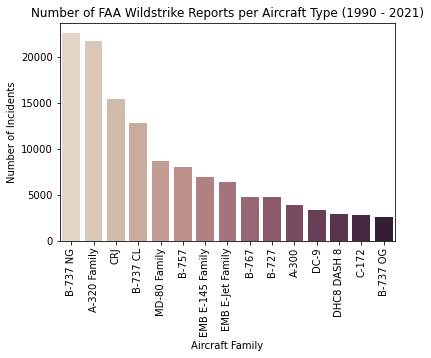

In [6]:
ac_types_plt = sns.barplot(x="TYPE_FAM", y = "INDX_NR", 
                           palette="ch:.25", 
                           data=ac_types.groupby('TYPE_FAM').sum().sort_values(by = 'INDX_NR', ascending = False).reset_index()[:15])
ac_types_plt.set_xticklabels(ac_types_plt.get_xticklabels(), rotation=90)
ac_types_plt.set(xlabel='Aircraft Family', ylabel='Number of Incidents')
ac_types_plt.set_title('Number of FAA Wildstrike Reports per Aircraft Type (1990 - 2021)')
ac_types_plt
plt.show()

## Analysis 

### Bird Strikes dependent on the Flight Phase

In [7]:
phase_of_flight = df[['PHASE_OF_FLIGHT','HEIGHT','SPECIES','COMMENT']].copy()
# I convert to meters
phase_of_flight['HEIGHTM'] = phase_of_flight['HEIGHT']*0.3048 

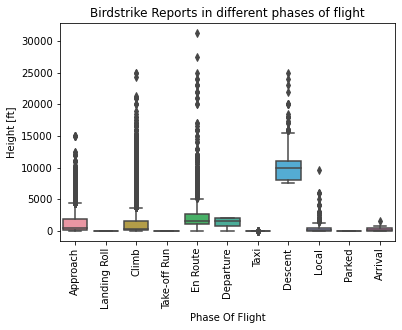

In [8]:
A1 = sns.boxplot(x="PHASE_OF_FLIGHT", y="HEIGHT", data =phase_of_flight[phase_of_flight['PHASE_OF_FLIGHT']!='Unknown'])
A1.set_xticklabels(A1.get_xticklabels(), rotation=90)
A1.set(xlabel='Phase Of Flight', ylabel='Height [ft]')
A1.set_title('Birdstrike Reports in different phases of flight')
plt.show()

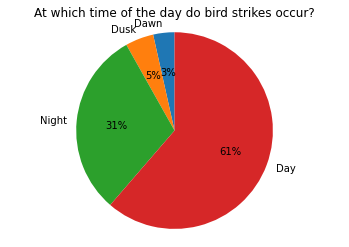

In [9]:
A2d = df.groupby('TIME_OF_DAY')['TIME_OF_DAY'].count().sort_values(ascending = True)
fig, A2 = plt.subplots()
A2.pie(A2d, labels = A2d.index, autopct='%1.f%%', startangle=90)
A2.axis('equal') 
A2.set_title('At which time of the day do bird strikes occur?')
plt.show() 

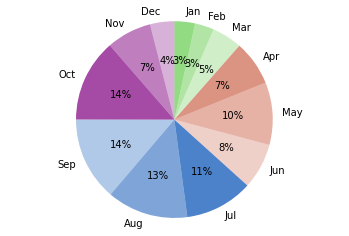

In [10]:
fig, A3 = plt.subplots()  
A3.pie(df.groupby('INCIDENT_MONTH')['INCIDENT_MONTH'].count() , 
       labels = ['Jan', 'Feb', 'Mar', 
                 'Apr', 'May','Jun','Jul','Aug',
                 'Sep','Oct','Nov','Dec'], counterclock = False,
       autopct='%1.f%%', startangle=90, colors = [(0.4,0.8,0.3,0.7),(0.4,0.8,0.3,0.5),(0.4,0.8,0.3,0.3),
                                                 (0.8,0.4,0.3,0.7),(0.8,0.4,0.3,0.5),(0.8,0.4,0.3,0.3),
                                                 (0.0,0.3,0.7,0.7),(0.0,0.3,0.7,0.5),(0.0,0.3,0.7,0.3),
                                                 (0.5,0.0,0.5,0.7),(0.5,0.0,0.5,0.5),(0.5,0.0,0.5,0.3)])
A3.axis('equal')  
plt.show() 

Incidents with known damage values are shown. The Classes A to E are military damage categories.

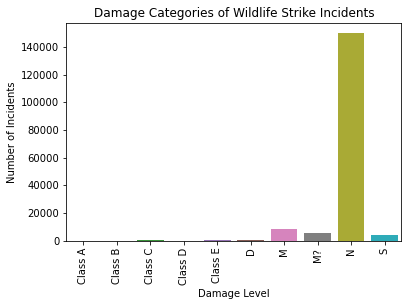

In [11]:
A4d = df.groupby('DAMAGE_LEVEL')['INDX_NR'].count().to_frame().reset_index()
A4d.columns = ['DMG_LVL', 'NR_INCIDENTS']
A4 = sns.barplot(x = 'DMG_LVL', y = 'NR_INCIDENTS', data = A4d)
A4.set_xticklabels(A4d['DMG_LVL'], rotation=90)
A4.set(xlabel='Damage Level', ylabel='Number of Incidents')
A4.set_title('Damage Categories of Wildlife Strike Incidents')
plt.show()

In [12]:
A4d.set_index('DMG_LVL')
A4d['TYPE'] = A4d['DMG_LVL'].apply(lambda x: 'M' if x.startswith('Class') else 'C')
A4d['PERCENTAGE'] = A4d.apply(lambda x: x.NR_INCIDENTS / A4d[A4d['TYPE'] == 'M'].NR_INCIDENTS.sum()*100 if x.TYPE == 'M' 
                              else x.NR_INCIDENTS / A4d[A4d['TYPE'] == 'C'].NR_INCIDENTS.sum()*100, axis = 1)
A4d 

,DMG_LVL,NR_INCIDENTS,TYPE,PERCENTAGE
0,Class A,1,M,0.194175
1,Class B,10,M,1.941748
2,Class C,80,M,15.533981
3,Class D,1,M,0.194175
4,Class E,423,M,82.135922
5,D,136,C,0.081089
6,M,8270,C,4.930925
7,M?,5389,C,3.213151
8,N,149802,C,89.318316
9,S,4120,C,2.456519


The overwhelming number of incidents result in no reported damage (`N`) for civilian (89.3\%) and less than $20.000 or `Class E` (which includes no costs) for military airplanes (82.6\%). 

## Engine Number and Placement

The convention for the numbering of engines is from left to right from the pilot's perspective, who faces forward. From looking at the data, this seems to be the case here, too. 

In [13]:
nr_eng = df[['TYPE_FAM', 'NUM_ENGS', 'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'TYPE_ENG',
            'DAM_ENG1','STR_ENG1','DAM_ENG2','STR_ENG2','DAM_ENG3','STR_ENG3','DAM_ENG4','STR_ENG4']] 
strck_eng_df = nr_eng[(nr_eng['STR_ENG1'] != False) | (nr_eng['STR_ENG2'] != False) |
                       (nr_eng['STR_ENG3'] != False) | (nr_eng['STR_ENG4'] != False)]

For twin-engine aircraft, the following statistics is found:

In [14]:
strck_eng_df[['STR_ENG1','STR_ENG2','STR_ENG3','STR_ENG4']][strck_eng_df['NUM_ENGS'] == 2].sum()

STR_ENG1    10836
STR_ENG2     9470
STR_ENG3        6
STR_ENG4        5
dtype: int64

There are entries where engine 3 and 4 are listed as struck. A look at the entries where this inconsistency occurs reveals that in these cases, the number of engines is correctly listed, while the positional variables `ENG_`x`_POS` and the `STR_ENG`x variables cannot be consistently assigned. These entries will be left out of the further analysis. Similarly, for aircraft with 3 engines, the same sanity check is done, but this time, there are no inconsistently labeled variable pairs.

In [15]:
strck_eng_df[['TYPE_FAM','ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS','STR_ENG1',
              'STR_ENG2','STR_ENG3','STR_ENG4']][(strck_eng_df['NUM_ENGS'] == 2) & 
             ((strck_eng_df['STR_ENG4'] != False)|(strck_eng_df['STR_ENG3'] != False))]  

,TYPE_FAM,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,STR_ENG1,STR_ENG2,STR_ENG3,STR_ENG4
18903,B-737 NG,1.0,1.0,NaN,NaN,True,False,False,True
19138,A-320 Family,1.0,1.0,NaN,NaN,False,False,True,False
28696,B-737 NG,1.0,1.0,NaN,NaN,True,False,False,True
29130,A-300,1.0,1.0,NaN,NaN,False,False,True,True
29983,HAWKER 800,5.0,5.0,NaN,NaN,False,False,False,True
38824,B-757,1.0,1.0,NaN,NaN,False,False,False,True
39480,B-737 NG,1.0,1.0,NaN,NaN,False,False,True,False
39718,EMB E-Jet Family,1.0,1.0,NaN,NaN,False,False,True,False
89010,EMB E-145 Family,5.0,5.0,NaN,NaN,False,False,True,False
129750,A-10A,NaN,NaN,NaN,NaN,False,False,True,False


In [16]:
str_eng_2 = strck_eng_df[['STR_ENG1','STR_ENG2']][(strck_eng_df['NUM_ENGS'] == 2) & 
                                                            ((strck_eng_df['STR_ENG4'] == False) &  
                                                              (strck_eng_df['STR_ENG3'] == False))].sum()
str_eng_3 = strck_eng_df[['STR_ENG1','STR_ENG2','STR_ENG3']][(strck_eng_df['NUM_ENGS'] == 3)].sum()
str_eng_4 = strck_eng_df[['STR_ENG1','STR_ENG2','STR_ENG3','STR_ENG4']][(strck_eng_df['NUM_ENGS'] == 4)].sum()
str_eng_4_lr = pd.Series([str_eng_4['STR_ENG1']+str_eng_4['STR_ENG2'], str_eng_4['STR_ENG3']+str_eng_4['STR_ENG4']],
                        index = ['left', 'right'])
str_eng_4_lr

left     557
right    466
dtype: int64

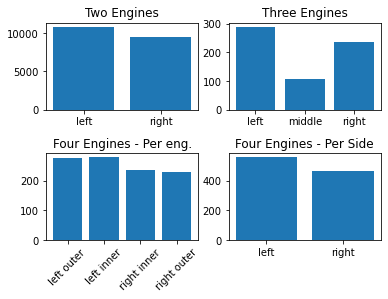

In [17]:
ax = plt.subplot(221) 
ax.bar(str_eng_2.index, str_eng_2.values) 
ax.set_xticklabels(['left','right']) 
ax.set_title("Two Engines")
ax = plt.subplot(222) 
ax.bar(str_eng_3.index, str_eng_3.values)
ax.set_xticklabels(['left','middle','right'])
ax.set_title("Three Engines")
ax = plt.subplot(223) 
ax.bar(str_eng_4.index, str_eng_4.values)
ax.set_xticklabels(['left outer','left inner','right inner', 'right outer'], rotation = 45)
ax.set_title("Four Engines - Per eng.")
ax = plt.subplot(224) 
ax.bar(str_eng_4_lr.index, str_eng_4_lr.values)
ax.set_title("Four Engines - Per Side")

plt.subplots_adjust(hspace=0.5)
plt.show()

Across all aircraft types, the graph shows a tendency of bird strikes to occur on the left side of the airplane. To investigate this further, a hypothesis test is conducted. We suspect the engines of one particular side to be involved into a bird strike incident more often than the other side and declare this the alternate hypothesis. The null hypothesis postulates equal probability. Note that incidents where bird strikes occur on both sides are also included.

$H_A: p_{side} \neq 0.5,\quad H_0: p_{side} = 0.5$

I will choose the hypotheses to be one-sided, i.e. $p_A > p_0$ for left side involvement $p_A < p_0$ for right side involvement.

In [18]:
from statsmodels.stats.proportion import proportions_ztest

# put data together 

len2 = len(strck_eng_df[(strck_eng_df['NUM_ENGS'] == 2) & ((strck_eng_df['STR_ENG4'] == False) &  
                                                           (strck_eng_df['STR_ENG3'] == False))])
len3 = len(strck_eng_df[(strck_eng_df['NUM_ENGS'] == 3) & ((strck_eng_df['STR_ENG1'] == True) |  
                                                           (strck_eng_df['STR_ENG3'] == True))]) 
len4 = len(strck_eng_df[(strck_eng_df['NUM_ENGS'] == 4)]) 
number_of_incidents = len2 + len3 + len4

str_all = pd.Series([((str_eng_4['STR_ENG1']+str_eng_4['STR_ENG2'])/len4
                     + (str_eng_3['STR_ENG1'])/len3
                     + (str_eng_2['STR_ENG1'])/len2)/3,  
                     ((str_eng_4['STR_ENG3']+str_eng_4['STR_ENG4'])/len4
                     + (str_eng_3['STR_ENG3'])/len3
                     + (str_eng_2['STR_ENG2'])/len2)/3],
                        index = ['left', 'right']) 
str_all

left     0.575438
right    0.484546
dtype: float64

In [19]:
# p-values for the test H_0: p_left = 0.5, H_A: p_left > 0.5
print(proportions_ztest(str_eng_4['STR_ENG1']+str_eng_4['STR_ENG2'], len4, value = 0.5, alternative = 'larger')[1])
print(proportions_ztest(str_eng_3['STR_ENG1'], len3, value = 0.5, alternative = 'larger')[1])
print(proportions_ztest(str_eng_2['STR_ENG1'], len2, value = 0.5, alternative = 'larger')[1])
# p-values for the test H_0: p_right = 0.5, H_A: p_right < 0.5
print(proportions_ztest(str_eng_4['STR_ENG3']+str_eng_4['STR_ENG4'], len4, value = 0.5, alternative = 'smaller')[1])
print(proportions_ztest(str_eng_3['STR_ENG3'], len3, value = 0.5, alternative = 'smaller')[1])
print(proportions_ztest(str_eng_2['STR_ENG2'], len2, value = 0.5, alternative = 'smaller')[1])

1.5495553518743265e-09
0.0003599450836383962
2.4742702441225133e-57
0.44798840417466196
0.08304852402446111
9.087690570380972e-05


With these p-values, the null hypothesis can be rejected for the left side regardless of engine count. There is evidence that, if there is a bird strike, the left side is involved more often than in 50 percent of the cases. Meanwhile, we can only reject the null hypothesis for two-engined jets and involvement of right side engines.

Indeed, studies have been conducted on this topic which came to the same results (_Positive bias in bird strikes to engines on left side of aircraft_ , Dolbeer and Barnes, _Human–Wildlife Interactions 11(1):33–40, Spring 201_ [Link](https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=1396&context=hwi)). A possible explanation is the right light on the tip of the plane's left wing, which is harder to recognize for avian vision.

### Aircraft Type vs. Number of Birdstrike Incidents

In an effort to explore which airframes are affected by birdstrikes the most, I searched the web for available databases either on daily flights in the US from the year 2019 on, which I did not find, or a list of registered aircraft in the same year.

I could not find a source on the registration status of the entries, so I decided to only include aircraft that have a date up until which they have an active registration. This dataset is then compared to the bird strike from 2019 up until the last update of the wildlife strike database (Jan 2021) to get a rough comparison of wildlife strikes to registered aircraft.

The categorization of every aircraft is done analogously to before, but this time, I don't differentiate between the generations of the B 737 and the B 747 anymore.

In [23]:
US_reg['TYPE_FAM'] = US_reg['typecode'].apply(lambda x: gen_type_reg(x)) 

In [24]:
nr_of_reg_ac = US_reg.groupby('TYPE_FAM').count().sort_values(by = 'typecode', ascending = False)
nr_of_reg_ac = nr_of_reg_ac['registration'].to_frame().reset_index()

In [25]:
ac_types_no = df[(df['INCIDENT_YEAR'] > 2018) & (df['REG'].str.startswith(' N'))].copy() 

In [26]:
ac_types_no['TYPE_FAM'] = ac_types_no['TYPE_FAM'].apply(lambda x : 'B-737' if x.startswith('B-737') 
                                                        else 'B-747' if x.startswith('B-747') 
                                                        else x)
ac_types_no = ac_types_no.groupby('TYPE_FAM').count()['INDX_NR'].to_frame().reset_index()

This is a list of the most common aircraft types and the number of reported incidents of wildlife strikes from 2019 on. 

In [27]:
ac_types_no[(ac_types_no['TYPE_FAM'] != 'UNKNOWN')].sort_values(by='INDX_NR', ascending = False)[0:8].T

,25,3,121,159,158,28,27,78
TYPE_FAM,B-737,A-320 Family,CRJ,EMB E-Jet Family,EMB E-145 Family,B-767,B-757,C-172
INDX_NR,3666,2984,1366,1297,674,489,451,421


Now I introduce the naive factor `q`, which is the quotient of the number of wildlife strikes and the number of registered aircraft. The general trend of short or long haul aircraft types experiencing more incidents is easily explained by the number of flight cycles they conduct per day.

In [28]:
res = pd.merge(ac_types_no, nr_of_reg_ac, on="TYPE_FAM")
res['q'] = res['INDX_NR'] / res['registration']
res.columns = ['Type','No_Strikes','No_Registered','q']

 Regional legs (commuter routes) are usually served by smaller aircraft like the E-145 family, CRJ, DHC-8 Dash and often have a duration of under an hour, while short/medium haul routes in the US are served by the B737, B717, A320, EMB E-Jets and the MD-80/90. Aircraft on long-haul routes like the B-747 or the A-330 have the least time at the lower heights (see A1) in which bird strikes most frequently occur. Notable aircraft types with a higher range which rank high nontheless are the A-300, the DC-10 and the MD-11, all of which are (probably) exclusively used as freighters.

Through this factor, the A320 (A318, A319, A320, A321) and Embraer E-Jet family are identified as having a high number of bird strikes in comparison to the number of currently registered airframes in the databases.

In [29]:
res.sort_values(by='q', ascending = False)[0:17]

,Type,No_Strikes,No_Registered,q
1,A-320 Family,2984,357,8.358543
15,EMB E-Jet Family,1297,156,8.314103
3,B-717,242,86,2.813953
0,A-300,322,117,2.752137
14,EMB E-145 Family,674,247,2.728745
5,B-737,3666,1652,2.219128
12,DC-10,80,42,1.904762
11,CRJ,1366,803,1.701121
16,MD-11,166,104,1.596154
8,B-767,489,355,1.377465
